In [4]:
# set up libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

True

In [6]:
# grab the intelimon data
intelimon_data = pd.read_csv(f"C:/Users/{os.getenv("MS_USER_NAME")}/Desktop/Hitchiti_IntensiveBiomass_TLSMetrics/merged_metrics.csv")
print(intelimon_data)

   Unnamed: 0.1 Unnamed: 0             h_filename    h_script_name  \
0             0        25%  GACHF_0046_20231127_1  IntELiMon_1.1.1   
1             1        25%  GACHF_0046_20231127_2  IntELiMon_1.1.1   
2             2        25%  GACHF_0047_20231127_1  IntELiMon_1.1.1   
3             3        25%  GACHF_0047_20231127_2  IntELiMon_1.1.1   
4             4        25%  GACHF_0048_20231127_1  IntELiMon_1.1.1   
5             5        25%  GACHF_0048_20231127_2  IntELiMon_1.1.1   

   h_ground_cnt  h_not_ground_cnt  h_per_ground  h_ng_tgi      h_ng_vari  \
0       1708526           1509268     53.096190  1.577028  474624.818404   
1       1091387           1478476     42.468684 -6.703746  390509.323676   
2       1746586           1160030     60.090015  4.808763  254232.952599   
3        248454            221124     52.910060 -6.038919  243176.519397   
4       1602504           1355043     54.183551  4.265567  292538.252386   
5        839699           1068262     44.010281 -7.29

In [17]:
# grab the biomass data
biomass_data = pd.read_csv(f"C:/Users/{os.getenv("MS_USER_NAME")}/Desktop/lidar_scan_calibration/csv_data/kriged_biomass_estimations.csv")
total_biomasses = biomass_data.loc[biomass_data["biomass_type"] == "total_biomass", "kriged_biomass"]
total_biomasses.reset_index(drop=True, inplace=True)
print(total_biomasses)

0    199007.668070
1    222088.136286
2    522953.588750
Name: kriged_biomass, dtype: float64


In [25]:
# add biomass data to intelimon data
intelimon_data.loc[0, "biomass"] = total_biomasses[0]
intelimon_data.loc[1, "biomass"] = total_biomasses[0]
intelimon_data.loc[2, "biomass"] = total_biomasses[1]
intelimon_data.loc[3, "biomass"] = total_biomasses[1]
intelimon_data.loc[4, "biomass"] = total_biomasses[2]
intelimon_data.loc[5, "biomass"] = total_biomasses[2]

print(intelimon_data["biomass"])

0    199007.668070
1    199007.668070
2    222088.136286
3    222088.136286
4    522953.588750
5    522953.588750
Name: biomass, dtype: float64


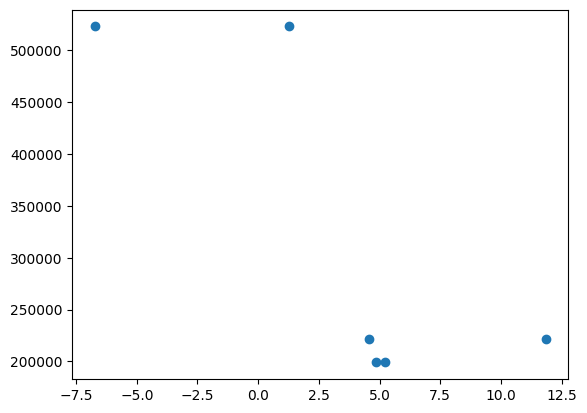

In [34]:
plt.scatter(intelimon_data["h_l4_tgi"], intelimon_data["biomass"])